# Plot experiment results

In [1]:
%matplotlib inline
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import os
import pickle

In [66]:
indir = "/Users/sebastianmacaluso/Documents/HCmanager/experiments/ginkgo/"
filename = os.path.join(indir,"outjets_14N_1trees_25tcut_1.pkl")
with open(filename, "rb") as fd:
    
    tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations = pickle.load(fd, encoding='latin-1')

In [241]:
indir = "/Users/sebastianmacaluso/Documents/HCmanager/experiments/ginkgo/ApproxAstar/"
filename = os.path.join(indir,"outjets_16N_1trees_11tcut_44_MaxSize_10_NumTries_20_10.pkl")
with open(filename, "rb") as fd:
    
    tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations, NodesExplored ,details,_= pickle.load(fd, encoding='latin-1')

EOFError: Ran out of input

In [207]:
 tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations,NodesExplored, details

([16],
 {'truth': [-101.71531963348389], 'approx_a_star': array([-79.74283007])},
 {'truth': [0], 'approx_a_star': [0]},
 {'truth': [0], 'approx_a_star': array([542.0428896])},
 {'truth': [0], 'approx_a_star': array([5394.])},
 {'approx_a_star': array([8541.])},
 {'NumTries': [20, 10], 'all_pairs_max_size': 10, 'max_steps': 5000000000})

In [2]:
def load_results(scans, input_dir, algorithm, baseline=None):


#     algo_dict={}
    features = ["mean_tree_size", "mean_log_likelihoods", "log_likelihoods_err", "mean_illegal_actions", "mean_times", "times_err","mean_space_complexity","space_complexity_err" ,"nodes_explored", "nodes_explored_err"]
    algo_dict ={key:[] for key in features}

    
    baseline = "Greedy"
    indir = "/Users/sebastianmacaluso/Documents/HCmanager/experiments/ginkgo/"+str(input_dir)+"/"
    
    
    for scan in scans:

        tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations, NodesExplored = [],[],[],[],[],[]
        for file in os.listdir(indir):
#             print("scan=", scan)
            filename= os.path.join(indir,file)
            if file.startswith(scan[0]) and file.endswith(scan[1]) and os.path.getsize(filename) > 0:
                
#                 print("file=", file)
                with open(filename, "rb") as fd:
        
                    tree_size_, log_likelihoods_, illegal_actions_, times_, likelihood_evaluations_, NodesExplored_, _, _ = pickle.load(fd, encoding='latin-1')
    
                    tree_size+= tree_size_
                    log_likelihoods =  np.concatenate((log_likelihoods, log_likelihoods_[str(algorithm)]),axis=0)
                    illegal_actions= np.concatenate((illegal_actions, illegal_actions_[str(algorithm)]),axis=0)
                    times= np.concatenate((times,times_[str(algorithm)]),axis=0)
                    likelihood_evaluations = np.concatenate((likelihood_evaluations,likelihood_evaluations_[str(algorithm)]),axis=0)
                    
                    if NodesExplored_:
                        NodesExplored = np.concatenate((NodesExplored, NodesExplored_[str(algorithm)]),axis=0)

                    
        algo_dict["mean_tree_size"]+=[ np.nanmean(tree_size)]
        algo_dict["mean_log_likelihoods"]+=[np.nanmean(log_likelihoods)]
#         algo_dict["mean_log_likelihoods"]=np.concatenate((algo_dict["mean_log_likelihoods"],np.round(log_likelihoods,2)))
        algo_dict["log_likelihoods_err"]+=[np.nanstd(log_likelihoods) / np.sum(np.isfinite(log_likelihoods))**0.5]
    
        algo_dict["mean_times"] +=[np.nanmean(times) ]
        algo_dict["times_err"] +=[np.nanstd(times) / np.sum(np.isfinite(times))**0.5]
        
        if np.isnan(np.nanmean(likelihood_evaluations)):
            algo_dict["mean_space_complexity"] +=[np.nanmean(likelihood_evaluations) ]
        else:
            algo_dict["mean_space_complexity"] +=[int(np.nanmean(likelihood_evaluations) )]
            
        algo_dict["space_complexity_err"] +=[np.nanstd(likelihood_evaluations) / np.sum(np.isfinite(likelihood_evaluations))**0.5]
#         algo_dict["space_complexity_err"] +=[np.nanstd(likelihood_evaluations) / np.sum(np.isfinite(likelihood_evaluations))**0.5]
        
        if NodesExplored_:
            if np.isnan(np.nanmean(NodesExplored)):
                algo_dict["nodes_explored"] +=[np.nanmean(NodesExplored)]
            else:
                algo_dict["nodes_explored"] +=[int(np.nanmean(NodesExplored)) ]
            algo_dict["nodes_explored_err"] +=[np.nanstd(NodesExplored) / np.sum(np.isfinite(NodesExplored))**0.5]

    return algo_dict
    


In [234]:
scans=[]
# for N in [4,5,6,7,8,9]:
#     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
for N in [15]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]

In [235]:
ApproxAstar = load_results(scans, "ApproxAstar", "approx_a_star")
# Greedy = load_results(scans, "BeamSearchGreedy", "Greedy")
# ExactTrellis = load_results(scans, "ExactTrellis", "exact_trellis")

In [199]:
ApproxAstar

{'mean_tree_size': [15.0],
 'mean_log_likelihoods': [-76.10110796659723],
 'log_likelihoods_err': [0.46818412166859286],
 'mean_illegal_actions': [],
 'mean_times': [1772.1041003538637],
 'times_err': [78.48334162976244],
 'mean_space_complexity': [36076],
 'space_complexity_err': [4509.84437111347],
 'nodes_explored': [19739],
 'nodes_explored_err': [935.814526607348]}

In [3]:
scans=[]
for N in [4,5,6,7,8,9]:
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
for N in [10]:
    scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
for N in [12]:
    scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
for N in [13,14,15,16, 18,22,24, 28, 32, 36]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]

In [4]:
Greedy = load_results(scans, "BeamSearchGreedy", "Greedy")
BeamSearch = load_results(scans, "BeamSearchGreedy", "BS")
# BeamSearchL = load_results(scans, "BeamSearchGreedy1000", "BS")
ExactTrellis = load_results(scans, "ExactTrellis", "exact_trellis")
ExactAstar = load_results(scans, "ExactAstar", "exact_a_star")

/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.p

In [369]:
scans=[]
for N in [4,5]:    
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
for N in [6,7,8,9]:
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
for N in [10]:
    scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
for N in [12]:
    scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
for N in [13,14]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
for N in [15]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
for N in [18]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [22]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_8_5.pkl"]]  
for N in [24]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_20_10.pkl"]]     
for N in [28]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]      
for N in [28, 32, 36]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  

In [15]:
scans=[]
for N in [4,5]:    
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
for N in [6,7,8,9]:
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
for N in [10]:
    scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
for N in [12]:
    scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
for N in [13,14]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_50_20.pkl"]]
for N in [15]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
for N in [16]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_100_60.pkl"]]  
for N in [18]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [22]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [24]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]      
for N in [28]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
for N in [32, 36]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  

In [16]:
ApproxAstar = load_results(scans, "ApproxAstar", "approx_a_star")

/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.p

In [250]:
# ApproxAstar

In [377]:
2**9

512

In [274]:
# scans=[]
# for N in [4,5,6,7,8,9]:
#     scans+=["outjets_"+str(N)+"N_20trees_25tcut_"]
# for N in [10]:
#     scans+=["outjets_"+str(N)+"N_5trees_25tcut_"]
# for N in [12]:
#     scans+=["outjets_"+str(N)+"N_2trees_25tcut_"]
# for N in [13,14,15,16,18,22]:
#     scans+=["outjets_"+str(N)+"N_1trees_25tcut_"]

In [118]:
# algos = ['truth', 'Greedy', 'BS', 'exact_trellis', 'exact_a_star', 'approx_a_star']

# Greedy = load_results(scans, "BeamSearchGreedy", "Greedy")
# BeamSearch = load_results(scans, "BeamSearchGreedy", "BS")
# BeamSearchL = load_results(scans, "BeamSearchGreedy1000", "BS")
# ExactAstar = load_results(scans, "ExactAstar", "exact_a_star")
# ExactTrellis = load_results(scans, "ExactTrellis", "exact_trellis")

In [194]:
ExactAstar["mean_log_likelihoods"][38:44]

array([-64.85, -61.43, -66.21, -60.97, -66.54, -60.37])

In [184]:
np.round([2.345,1.23434],2)

array([2.35, 1.23])

In [195]:
ExactTrellis["mean_log_likelihoods"][38:44]

array([-64.85, -61.43, -60.25, -60.97, -66.54, -60.36])

In [186]:
# ExactAstar["mean_log_likelihoods"]
c = np.empty((ExactAstar["mean_log_likelihoods"].size + ExactTrellis["mean_log_likelihoods"].size,), dtype=ExactAstar["mean_log_likelihoods"].dtype)
c[0::2] = ExactAstar["mean_log_likelihoods"]
c[1::2] = ExactTrellis["mean_log_likelihoods"]

AttributeError: 'list' object has no attribute 'size'

In [7]:
labels = {}

labels["Truth"] = "Truth"
labels["Greedy"] = "Greedy"
labels["BeamSearch"] = "Beam Search"
labels["BeamSearchL"] = "Beam SearchL"
labels["ExactTrellis"] = "Exact Trellis"
labels["ExactAstar"] = "Exact $A^*$"
labels["ApproxAstar"] = "Approx. $A^*$"


# labels["mle"] = "MLE"
# labels["random"] = "Random"
# labels["greedy"] = "Greedy"

# labels["beamsearch_s"] = "Beam search"
# labels["beamsearch_m"] = "Beam search"
# labels["beamsearch_l"] = "Beam search"
# labels["beamsearch_xl"] = "Beam search"

# labels["mcts_xs"] = "MCTS"
# labels["mcts_s"] = "MCTS"
# labels["mcts_m"] = "MCTS"
# labels["mcts_l"] = "MCTS"

# labels["lfd"] = "BC"
# labels["lfd_mleteacher"] = "MLE-BC"

# labels["lfd-mcts_xs"] = "BC-MCTS"
# labels["lfd-mcts_s"] = "BC-MCTS"
# labels["lfd-mcts_m"] = "BC-MCTS"
# labels["lfd-mcts_l"] = "BC-MCTS"
# labels["lfd-mcts_mleteacher_xs"] = "BC-MCTS (MLE)"
# labels["lfd-mcts_mleteacher_s"] = "BC-MCTS (MLE)"
# labels["lfd-mcts_mleteacher_m"] = "BC-MCTS (MLE)"
# labels["lfd-mcts_mleteacher_l"] = "BC-MCTS (MLE)"

In [8]:
colors = {}

# https://coolors.co/053e61-337299-e6754c-e2bf9c-000000-808080
# blue0, blue1 = "#053E61", "#337299"
# red0, red1 = "#E6754C", "#E2BF9C"
# bw0, bw1 = "#000000", "#808080"

# https://coolors.co/000000-064a75-4984ab-ffaa33-b8b8b8
# blue0, blue1 = "#064A75", "#4984AB"
# red0, red1 = "#FFAA33", "#FFAA33"
# bw0, bw1 = "#000000", "#B8B8B8"

# https://coolors.co/000000-1d3557-457b9d-98CBCD-e63746
blue0, blue1, blue2 = "#1d3557", "#457b9d", "#98CBCD"
red0, red1, red2, red3 , red4= "#e63746", "#e63746", "#FF715B", "#F15025", "#A33B20"
bw0, bw1 = "#000000", "#000000"
green0, green1 = "#A5C882", "#6EB257"

# colors["mle"] = bw0
# colors["random"] = blue0

colors["Greedy"] =  blue0
colors["BeamSearch"] = blue1
# colors["BeamSearchL"] = blue0
colors["ExactTrellis"] = bw0
colors["ExactAstar"] = red3
colors["ApproxAstar"] = red4
# colors["ApproxAstar"] = red3


# colors["beamsearch_s"] = blue2

# colors["mcts_xs"] = red0
# colors["lfd-mcts_xs"] = red1
# colors["lfd-mcts_mleteacher_xs"] = red1
# colors["lfd"] = red0
# colors["lfd_mleteacher"] = red1

# colors["beamsearch_m"] = colors["beamsearch_l"] = colors["beamsearch_xl"] = colors["beamsearch_s"]
# colors["mcts_s"] = colors["mcts_m"] = colors["mcts_l"] = colors["mcts_xs"]
# colors["lfd-mcts_s"] = colors["lfd-mcts_m"] = colors["lfd-mcts_l"] = colors["lfd-mcts_xs"]
# colors["lfd-mcts_mleteacher_s"] = colors["lfd-mcts_mleteacher_m"] = colors["lfd-mcts_mleteacher_l"] = colors["lfd-mcts_mleteacher_xs"]

In [9]:
alphas = {}

for key, color in colors.items():
    if color == blue0 or color == blue1:
        alphas[key] = 0.1
    elif color == red2:
        alphas[key] = 0.12
    elif color == bw0:
        alphas[key] = 0.12
    else:
        alphas[key] = 0.2

In [10]:
linestyles = {}


linestyles["Greedy"] = "--"
linestyles["BeamSearch"] = "-."
linestyles["BeamSearchL"] = "--"
linestyles["ExactTrellis"] = ":"
linestyles["ExactAstar"] = "-."
linestyles["ApproxAstar"] = "--"

# linestyles["truth"] = "-."
# linestyles["mle"] = ":"
# linestyles["random"] = "-."

# linestyles["greedy"] = "--"

# linestyles["beamsearch_s"] = "-."
# linestyles["beamsearch_m"] = "-."
# linestyles["beamsearch_l"] = "-."
# linestyles["beamsearch_xl"] = "-."

# linestyles["mcts_xs"] = "-"
# linestyles["mcts_s"] = "-"
# linestyles["mcts_m"] = "-"
# linestyles["mcts_l"] = "-"

# linestyles["lfd-mcts_xs"] = ":"
# linestyles["lfd-mcts_s"] = ":"
# linestyles["lfd-mcts_m"] = ":"
# linestyles["lfd-mcts_l"] = ":"
# linestyles["lfd-mcts_mleteacher_xs"] = "-."
# linestyles["lfd-mcts_mleteacher_s"] = "-."
# linestyles["lfd-mcts_mleteacher_m"] = "-."
# linestyles["lfd-mcts_mleteacher_l"] = "-."

# linestyles["lfd"] = ":"
# linestyles["lfd_mleteacher"] = "-"


In [319]:
# ApproxAstar

In [320]:
np.subtract(ApproxAstar["mean_log_likelihoods"],ExactAstar["mean_log_likelihoods"])

array([ 0.00000000e+00,  0.00000000e+00,  4.59600084e-03,  0.00000000e+00,
       -2.72838945e-04, -2.46763103e-04,  1.28432042e-03,  4.46614983e-04,
                   nan,             nan,  1.42592031e-02, -7.92007132e+00,
                   nan,             nan,             nan,             nan,
                   nan,             nan])

In [321]:
# baseline

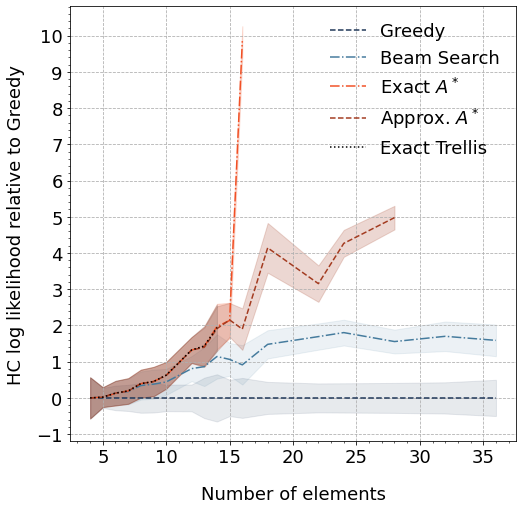

In [36]:
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "BeamSearchL":BeamSearchL}
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar, "ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"ApproxAstar":ApproxAstar}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["log_likelihoods_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="best", frameon=False,fontsize=18)

ax.tick_params(labelsize=18) 
ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
# ax.grid(which='major', axis='both', linestyle='--')
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=18)
plt.ylabel(f"HC log likelihood relative to Greedy", fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# ax.set_yscale('log')

In [372]:
40*79

3160

In [323]:
2**9

512

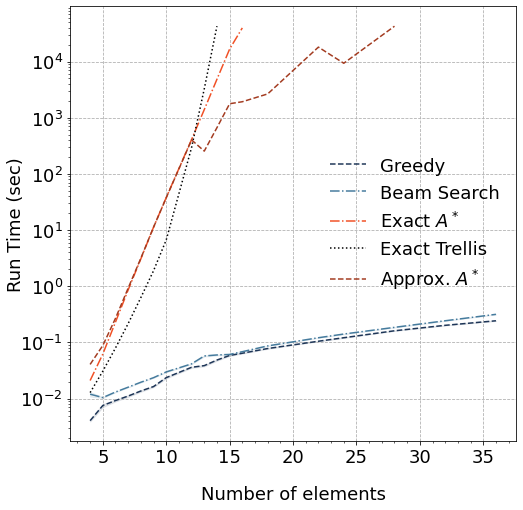

In [40]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ApproxAstar":ApproxAstar}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_times"], value["times_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="best", frameon=False, fontsize=fontsize)

ax.tick_params(labelsize=fontsize) 
ax.set_yscale('log')
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Run Time (sec)", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.xlim(3,22)

In [378]:
40000/3600

11.11111111111111

In [39]:
a=[(1,2),(3,3),(32.3,3)]
len(a)

3

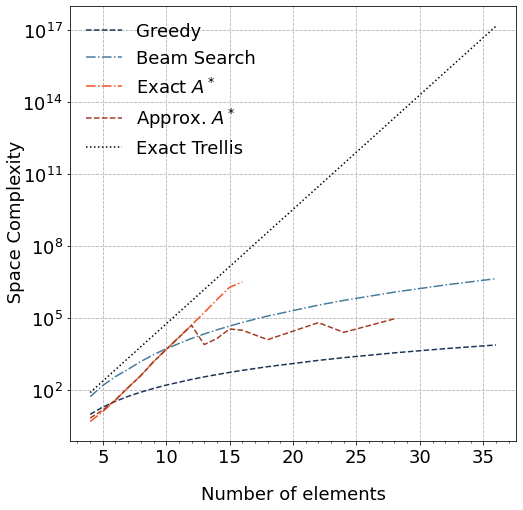

In [26]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ApproxAstar":ApproxAstar}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_space_complexity"], value["space_complexity_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

# Trellis complexity
plt.plot(x, 3**np.asarray(x),c=bw0, lw=1.5, ls=":",label="Exact Trellis")
    
    
plt.legend(loc="upper left", frameon=False, fontsize=18)
ax.set_yscale('log')
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements" ,fontsize=18)
plt.ylabel(f" Space Complexity" ,fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.xlim(3,22)

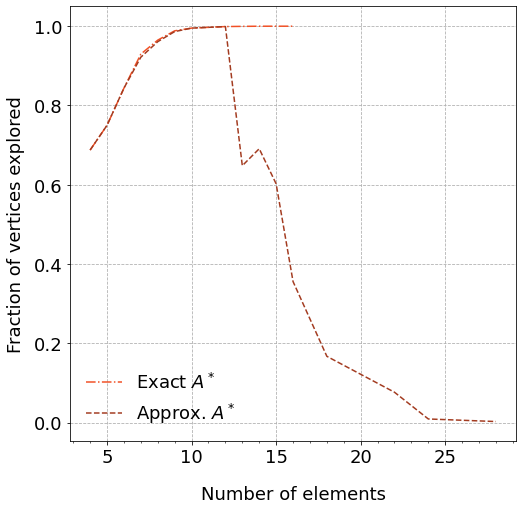

In [37]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
algorithms ={"ExactAstar":ExactAstar, "ApproxAstar":ApproxAstar}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["nodes_explored"]/ 2**np.asarray(baseline["mean_tree_size"]), value["nodes_explored_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="lower left", frameon=False, fontsize=fontsize)
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Fraction of vertices explored", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.xlim(3,22)

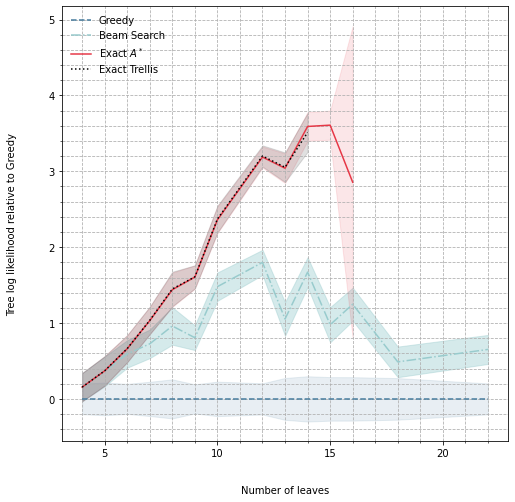

In [229]:
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "BeamSearchL":BeamSearchL}
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["std_log_likelihoods"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='both', axis='both', linestyle='--')
plt.xlabel("Number of leaves")
plt.ylabel(f"Tree log likelihood relative to Greedy")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.xlim(3,17.5)
# plt.ylim(-0.15, 4.5)

# # Smaller plot
# ax2 = inset_axes(
#     ax,
#     width="100%", height="100%",
#     bbox_to_anchor=(0.57, .13, .38, .38), 
#     bbox_transform=ax.transAxes, loc=3, borderpad=0
# )
    
# for key in plot:
#     x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
#     c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
#     if np.max(dy) > 1.e-3:
#         plt.fill_between(x, y-dy, y+dy, color=c, alpha=alpha)
#     plt.plot(x, y, c=c, lw=1.5, ls=ls)

# ax2.yaxis.set_major_locator(MultipleLocator(50.))
# ax2.xaxis.set_major_locator(MultipleLocator(5.))
# plt.xlim(5.5, 17.5)
# plt.ylim(-175,10)


# plt.subplots_adjust(left=0.13, bottom=0.13, right=0.99, top=0.99, wspace=0, hspace=0)
# plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves.pdf")

###### 

KeyError: 'BS'

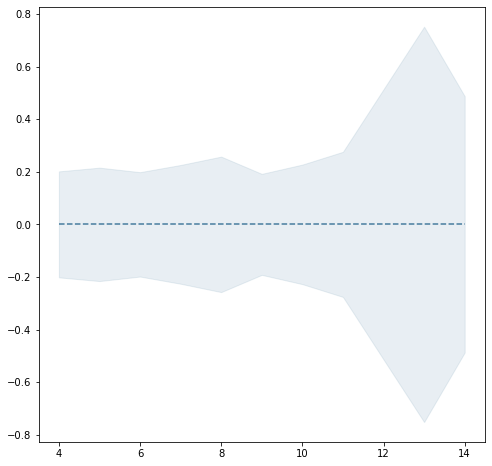

In [230]:
baseline = "Greedy"
plot = list(mean_log_likelihoods.keys())

fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key in plot[1::]:
#     x, y, dy = x, bin_log_likelihoods[key], bin_log_likelihood_err[key]
#     c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    x, y, dy = mean_tree_size, mean_log_likelihoods[key], std_log_likelihoods[key]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='both', axis='both', linestyle='--')
plt.xlabel("Number of leaves")
plt.ylabel(f"Tree log likelihood relative to {baseline}")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlim(3,17.5)
# plt.ylim(-0.15, 4.5)

# # Smaller plot
# ax2 = inset_axes(
#     ax,
#     width="100%", height="100%",
#     bbox_to_anchor=(0.57, .13, .38, .38), 
#     bbox_transform=ax.transAxes, loc=3, borderpad=0
# )
    
# for key in plot:
#     x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
#     c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
#     if np.max(dy) > 1.e-3:
#         plt.fill_between(x, y-dy, y+dy, color=c, alpha=alpha)
#     plt.plot(x, y, c=c, lw=1.5, ls=ls)

# ax2.yaxis.set_major_locator(MultipleLocator(50.))
# ax2.xaxis.set_major_locator(MultipleLocator(5.))
# plt.xlim(5.5, 17.5)
# plt.ylim(-175,10)


# plt.subplots_adjust(left=0.13, bottom=0.13, right=0.99, top=0.99, wspace=0, hspace=0)
# plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves.pdf")

In [73]:
3*15

45

(3.0, 22.0)

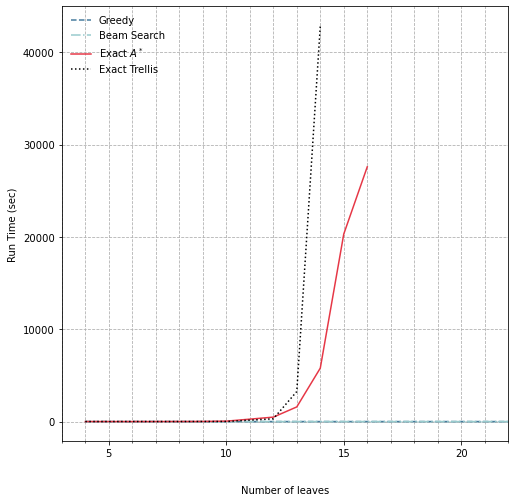

In [276]:
baseline = Greedy
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_times"], value["std_times"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='both', axis='both', linestyle='--')
plt.xlabel("Number of leaves")
plt.ylabel(f"Run Time (sec)")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlim(3,22)

In [315]:
50000/3600

13.88888888888889

(3.0, 17.5)

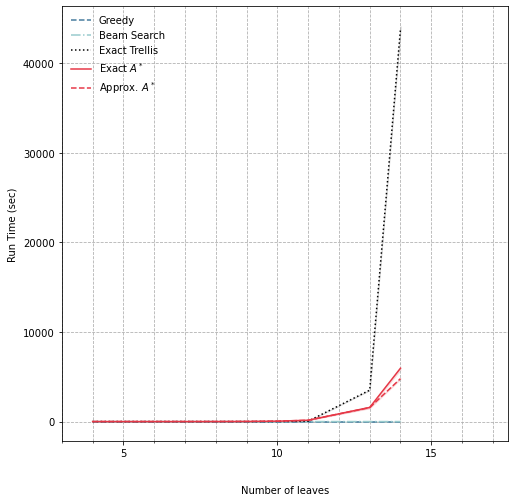

In [11]:
baseline = "Greedy"
plot = list(mean_times.keys())

fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key in plot[1::]:
#     x, y, dy = x, bin_log_likelihoods[key], bin_log_likelihood_err[key]
#     c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    x, y, dy = mean_tree_size, mean_times[key], std_times[key]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='both', axis='both', linestyle='--')
plt.xlabel("Number of leaves")
plt.ylabel(f"Run Time (sec)")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlim(3,17.5)

In [13]:
50000/3600

13.88888888888889

In [131]:
2**12

4096

In [363]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_20N_1000trees_1tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

In [364]:
N = [len(jet["leaves"]) for jet in jet_list]

(array([  3.,   4.,  12.,  31.,  39.,  66.,  90., 113., 130., 123., 106.,
         92.,  75.,  47.,  37.,  21.,   7.,   2.,   0.,   2.]),
 array([ 34.  ,  41.95,  49.9 ,  57.85,  65.8 ,  73.75,  81.7 ,  89.65,
         97.6 , 105.55, 113.5 , 121.45, 129.4 , 137.35, 145.3 , 153.25,
        161.2 , 169.15, 177.1 , 185.05, 193.  ]),
 <a list of 20 Patch objects>)

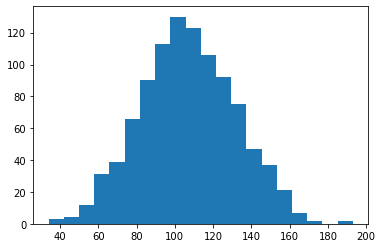

In [365]:
plt.hist(N, bins=20)

In [245]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_500trees_10tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

In [246]:
N = [len(jet["leaves"]) for jet in jet_list]

(array([ 6.,  4.,  3., 10., 17., 17., 26., 26., 70., 33., 33., 39., 70.,
        38., 25., 24., 31., 10., 11.,  7.]),
 array([ 7.  ,  8.25,  9.5 , 10.75, 12.  , 13.25, 14.5 , 15.75, 17.  ,
        18.25, 19.5 , 20.75, 22.  , 23.25, 24.5 , 25.75, 27.  , 28.25,
        29.5 , 30.75, 32.  ]),
 <a list of 20 Patch objects>)

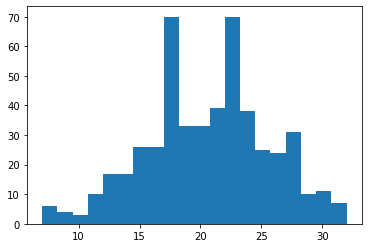

In [247]:
plt.hist(N, bins=20)

(array([  4.,   2.,   3.,  17.,  21.,  65.,  86.,  41., 123.,  80., 180.,
        134.,  51.,  82.,  30.,  41.,  26.,   9.,   4.,   1.]),
 array([ 6. ,  7.6,  9.2, 10.8, 12.4, 14. , 15.6, 17.2, 18.8, 20.4, 22. ,
        23.6, 25.2, 26.8, 28.4, 30. , 31.6, 33.2, 34.8, 36.4, 38. ]),
 <a list of 20 Patch objects>)

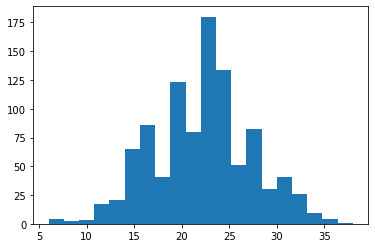

In [249]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_9tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

(array([  5.,  14.,  28.,  17.,  51.,  54., 124.,  66., 151.,  78., 139.,
         56.,  81.,  31.,  56.,  23.,  14.,   4.,   7.,   1.]),
 array([ 9. , 10.5, 12. , 13.5, 15. , 16.5, 18. , 19.5, 21. , 22.5, 24. ,
        25.5, 27. , 28.5, 30. , 31.5, 33. , 34.5, 36. , 37.5, 39. ]),
 <a list of 20 Patch objects>)

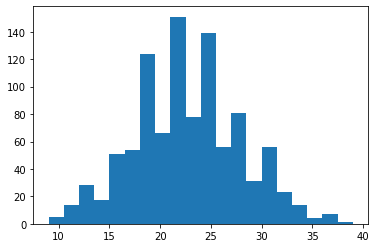

In [252]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_9tcut_14rate_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

(array([  4.,  12.,   9.,  20.,  45.,  27.,  87., 119.,  66., 159., 121.,
         56., 109.,  76.,  28.,  35.,  14.,   3.,   8.,   2.]),
 array([ 7.  ,  8.65, 10.3 , 11.95, 13.6 , 15.25, 16.9 , 18.55, 20.2 ,
        21.85, 23.5 , 25.15, 26.8 , 28.45, 30.1 , 31.75, 33.4 , 35.05,
        36.7 , 38.35, 40.  ]),
 <a list of 20 Patch objects>)

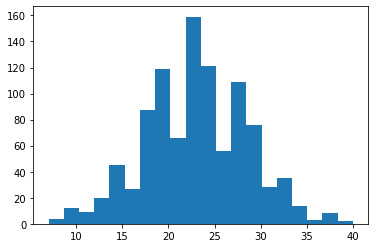

In [253]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_8tcut_15rate_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

(array([  1.,   6.,   9.,   9.,  22.,  50.,  68.,  44., 132., 129., 142.,
         74.,  97.,  83.,  62.,  18.,  31.,  15.,   6.,   2.]),
 array([ 6.  ,  7.75,  9.5 , 11.25, 13.  , 14.75, 16.5 , 18.25, 20.  ,
        21.75, 23.5 , 25.25, 27.  , 28.75, 30.5 , 32.25, 34.  , 35.75,
        37.5 , 39.25, 41.  ]),
 <a list of 20 Patch objects>)

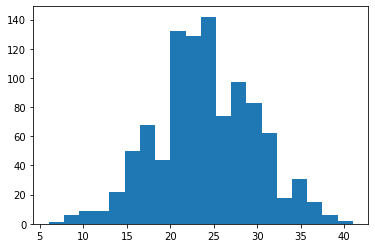

In [248]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_8tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

In [12]:
n_jets = 500
run_dir = "./data/runs"

jet_sizes = np.nan * np.ones(n_jets)
log_likelihoods = {}
costs = {}

for key, run_list in runs.items():
    log_likelihoods[key] = []
    costs[key] = []
    
    for run in run_list:
        try:
            jet_sizes = np.load(f"{run_dir}/{run}/eval_jet_sizes.npy")
        except Exception as e:
            pass
            # print(e)
        
        try:
            log_likelihoods[key].append(
                np.load(f"{run_dir}/{run}/eval_log_likelihood.npy").flatten()
            )
        except Exception as e:
            # print(e)
            log_likelihoods[key].append(np.nan * np.ones(n_jets))

        try:
            costs[key].append(
                np.load(f"{run_dir}/{run}/eval_likelihood_evaluations.npy").flatten()
            )
        except Exception as e:
            # print(e)
            costs[key].append(np.nan * np.ones(n_jets))


## Specify data

### Runs

In [2]:
runs = OrderedDict()

runs["truth"] = ["truth_20200930_092023_1000"]
runs["mle"] = ["mle_20200930_092023_1001"]
runs["random"] = [
    "random_20200930_092429_1060",
    "random_20200930_092430_1061",
    "random_20200930_092430_1062",
    "random_20200930_092430_1063",
    "random_20200930_092430_1064",
]
runs["greedy"] = ["greedy_20200930_092023_1003"]

runs["beamsearch_s"] = ["beamsearch_s_20200930_092023_1004"]
runs["beamsearch_m"] = ["beamsearch_m_20200930_092023_1005"]
runs["beamsearch_l"] = ["beamsearch_l_20200930_092023_1006"]
runs["beamsearch_xl"] = ["beamsearch_xl_20200930_092023_1007"]


In [3]:
runs["mcts_xs"] = [
    "mcts_nn_xs_20200930_092038_1000",
    "mcts_nn_xs_20200930_092038_1001",
    "mcts_nn_xs_20200930_092038_1002",
    "mcts_nn_xs_20200930_092038_1003",
    "mcts_nn_xs_20200930_092039_1004",
]
runs["mcts_s"] = [
    "mcts_nn_s_20200930_092039_1005",
    "mcts_nn_s_20200930_092039_1006",
    "mcts_nn_s_20200930_092039_1007",
    "mcts_nn_s_20200930_092039_1008",
    "mcts_nn_s_20200930_092039_1009",
]
runs["mcts_m"] = [
    "mcts_nn_m_20200930_092039_1010",
    "mcts_nn_m_20200930_092039_1011",
    "mcts_nn_m_20200930_092039_1012",
    "mcts_nn_m_20200930_092039_1013",
    "mcts_nn_m_20200930_092039_1014",
    "mcts_nn_m_20200916_215216",  # here we use one of the old runs as long as the new ones aren't done
]
runs["mcts_l"] = [
    "mcts_nn_l_20200930_092039_1015",
    "mcts_nn_l_20200930_092039_1019",
    "mcts_nn_l_20200930_092040_1016",
    "mcts_nn_l_20200930_092040_1017",
    "mcts_nn_l_20200930_092040_1018",
    "mcts_nn_l_20200911_172057",  # here we use one of the old runs as long as the new ones aren't done
]


In [4]:
runs["lfd-mcts_xs"] = [
    "lfd-mcts_xs_20200930_172410_1065",
    "lfd-mcts_xs_20200930_172410_1066",
    "lfd-mcts_xs_20200930_172410_1067",
    "lfd-mcts_xs_20200930_172410_1068",
    "lfd-mcts_xs_20200930_172410_1069",
]
runs["lfd-mcts_s"] = [
    "lfd-mcts_s_20200930_172410_1025",
    "lfd-mcts_s_20200930_172410_1026",
    "lfd-mcts_s_20200930_172410_1027",
    "lfd-mcts_s_20200930_172410_1028",
    "lfd-mcts_s_20200930_172410_1029",
]
runs["lfd-mcts_m"] = [
    "lfd-mcts_m_20200930_172410_1070",
    "lfd-mcts_m_20200930_172410_1071",
    "lfd-mcts_m_20200930_172410_1072",
    "lfd-mcts_m_20200930_172410_1073",
    "lfd-mcts_m_20200930_172410_1074",
]
runs["lfd-mcts_l"] = [
    "lfd-mcts_l_20200930_172410_1075",
    "lfd-mcts_l_20200930_172410_1076",
    "lfd-mcts_l_20200930_172410_1077",
    "lfd-mcts_l_20200930_172410_1078",
    "lfd-mcts_l_20200930_172410_1079",
]

runs["lfd-mcts_mleteacher_xs"] = [
    "lfd-mcts_mleteacher_xs_20200930_172410_1085",
    "lfd-mcts_mleteacher_xs_20200930_172410_1086",
    "lfd-mcts_mleteacher_xs_20200930_172410_1087",
    "lfd-mcts_mleteacher_xs_20200930_172410_1088",
    "lfd-mcts_mleteacher_xs_20200930_172410_1089",
]
runs["lfd-mcts_mleteacher_s"] = [
    "lfd-mcts_mleteacher_s_20200930_172410_1090",
    "lfd-mcts_mleteacher_s_20200930_172410_1091",
    "lfd-mcts_mleteacher_s_20200930_172551_1094",
    "lfd-mcts_mleteacher_s_20200930_172552_1092",
    "lfd-mcts_mleteacher_s_20200930_172552_1093",
]
runs["lfd-mcts_mleteacher_m"] = [
    "lfd-mcts_mleteacher_m_20200930_172552_1095",
    "lfd-mcts_mleteacher_m_20200930_172552_1096",
    "lfd-mcts_mleteacher_m_20200930_172552_1097",
    "lfd-mcts_mleteacher_m_20200930_172552_1098",
    "lfd-mcts_mleteacher_m_20200930_172552_1099",
]
runs["lfd-mcts_mleteacher_l"] = [
    "lfd-mcts_mleteacher_l_20200930_172553_1100",
    "lfd-mcts_mleteacher_l_20200930_172553_1101",
    "lfd-mcts_mleteacher_l_20200930_172553_1102",
    "lfd-mcts_mleteacher_l_20200930_172553_1103",
    "lfd-mcts_mleteacher_l_20200930_172553_1104",
]



In [5]:
runs["lfd"] = [
    "lfd_20200930_172410_1021",
    "lfd_20200930_172410_1022",
    "lfd_20200930_172410_1023",
    "lfd_20200930_172410_1024",
    "lfd_20200930_174303_1020",
]
runs["lfd_mleteacher"] = [
    "lfd_mleteacher_20200930_172410_1080",
    "lfd_mleteacher_20200930_172410_1081",
    "lfd_mleteacher_20200930_172410_1082",
    "lfd_mleteacher_20200930_172410_1083",
    "lfd_mleteacher_20200930_172410_1084",
]


In [6]:
runs["mcts_raw"] = [
    "mcts_raw_s_20200930_092053_1040",
    "mcts_raw_s_20200930_092113_1041",
    "mcts_raw_s_20200930_092225_1042",
    "mcts_raw_s_20200930_092225_1043",
    "mcts_raw_s_20200930_092244_1044",
]
runs["mcts_explore"] = [
    "mcts_s_explore_20200930_092044_1035",
    "mcts_s_explore_20200930_092539_1036",
    "mcts_s_explore_20200930_092540_1037",
    "mcts_s_explore_20200930_092540_1038",
    "mcts_s_explore_20200930_092540_1039",
]
runs["mcts_exploit"] = [
    "mcts_s_exploit_20200930_092039_1030",
    "mcts_s_exploit_20200930_092039_1031",
    "mcts_s_exploit_20200930_092039_1032",
    "mcts_s_exploit_20200930_092039_1033",
    "mcts_s_exploit_20200930_092039_1034",
]
runs["mcts_puctdecisions"] = [
    "mcts_puct_decisions_s_20200930_092243_1045",
    "mcts_puct_decisions_s_20200930_092243_1046",
    "mcts_puct_decisions_s_20200930_092244_1047",
    "mcts_puct_decisions_s_20200930_092324_1048",
    "mcts_puct_decisions_s_20200930_092324_1049",
]
runs["mcts_onlybs"] = ["mcts_only_bs_s_20200930_092023_1009"]
runs["mcts_nobs"] = [
    "mcts_nn_no_beamsearch_s_20200930_092324_1050",
    "mcts_nn_no_beamsearch_s_20200930_092324_1051",
    "mcts_nn_no_beamsearch_s_20200930_092324_1052",
    "mcts_nn_no_beamsearch_s_20200930_092324_1053",
    "mcts_nn_no_beamsearch_s_20200930_092324_1054",
]
runs["mcts_random"] = [
    "mcts_random_s_20200930_092324_1055",
    "mcts_random_s_20200930_092324_1056",
    "mcts_random_s_20200930_092324_1057",
    "mcts_random_s_20200930_092324_1058",
    "mcts_random_s_20200930_092324_1059",
]
runs["mcts_likelihood"] = ["mcts_likelihood_s_20200930_092023_1008"]


### Labels and style

In [7]:
labels = {}

labels["truth"] = "Truth"
labels["mle"] = "MLE"
labels["random"] = "Random"
labels["greedy"] = "Greedy"

labels["beamsearch_s"] = "Beam search"
labels["beamsearch_m"] = "Beam search"
labels["beamsearch_l"] = "Beam search"
labels["beamsearch_xl"] = "Beam search"

labels["mcts_xs"] = "MCTS"
labels["mcts_s"] = "MCTS"
labels["mcts_m"] = "MCTS"
labels["mcts_l"] = "MCTS"

labels["lfd"] = "BC"
labels["lfd_mleteacher"] = "MLE-BC"

labels["lfd-mcts_xs"] = "BC-MCTS"
labels["lfd-mcts_s"] = "BC-MCTS"
labels["lfd-mcts_m"] = "BC-MCTS"
labels["lfd-mcts_l"] = "BC-MCTS"
labels["lfd-mcts_mleteacher_xs"] = "BC-MCTS (MLE)"
labels["lfd-mcts_mleteacher_s"] = "BC-MCTS (MLE)"
labels["lfd-mcts_mleteacher_m"] = "BC-MCTS (MLE)"
labels["lfd-mcts_mleteacher_l"] = "BC-MCTS (MLE)"


In [8]:
colors = {}

# https://coolors.co/053e61-337299-e6754c-e2bf9c-000000-808080
# blue0, blue1 = "#053E61", "#337299"
# red0, red1 = "#E6754C", "#E2BF9C"
# bw0, bw1 = "#000000", "#808080"

# https://coolors.co/000000-064a75-4984ab-ffaa33-b8b8b8
# blue0, blue1 = "#064A75", "#4984AB"
# red0, red1 = "#FFAA33", "#FFAA33"
# bw0, bw1 = "#000000", "#B8B8B8"

# https://coolors.co/000000-1d3557-457b9d-98CBCD-e63746
blue0, blue1, blue2 = "#1d3557", "#457b9d", "#98CBCD"
red0, red1 = "#e63746", "#e63746"
bw0, bw1 = "#000000", "#000000"

colors["mle"] = bw0
colors["random"] = blue0

colors["greedy"] =  blue1
colors["beamsearch_s"] = blue2

colors["mcts_xs"] = red0
colors["lfd-mcts_xs"] = red1
colors["lfd-mcts_mleteacher_xs"] = red1
colors["lfd"] = red0
colors["lfd_mleteacher"] = red1

colors["beamsearch_m"] = colors["beamsearch_l"] = colors["beamsearch_xl"] = colors["beamsearch_s"]
colors["mcts_s"] = colors["mcts_m"] = colors["mcts_l"] = colors["mcts_xs"]
colors["lfd-mcts_s"] = colors["lfd-mcts_m"] = colors["lfd-mcts_l"] = colors["lfd-mcts_xs"]
colors["lfd-mcts_mleteacher_s"] = colors["lfd-mcts_mleteacher_m"] = colors["lfd-mcts_mleteacher_l"] = colors["lfd-mcts_mleteacher_xs"]


In [9]:
alphas = {}

for key, color in colors.items():
    if color == blue2:
        alphas[key] = 0.18
    elif color == blue0 or color == bw0:
        alphas[key] = 0.08
    else:
        alphas[key] = 0.12
    

In [10]:
linestyles = {}

linestyles["truth"] = "-."
linestyles["mle"] = ":"
linestyles["random"] = "-."

linestyles["greedy"] = "--"

linestyles["beamsearch_s"] = "-."
linestyles["beamsearch_m"] = "-."
linestyles["beamsearch_l"] = "-."
linestyles["beamsearch_xl"] = "-."

linestyles["mcts_xs"] = "-"
linestyles["mcts_s"] = "-"
linestyles["mcts_m"] = "-"
linestyles["mcts_l"] = "-"

linestyles["lfd-mcts_xs"] = ":"
linestyles["lfd-mcts_s"] = ":"
linestyles["lfd-mcts_m"] = ":"
linestyles["lfd-mcts_l"] = ":"
linestyles["lfd-mcts_mleteacher_xs"] = "-."
linestyles["lfd-mcts_mleteacher_s"] = "-."
linestyles["lfd-mcts_mleteacher_m"] = "-."
linestyles["lfd-mcts_mleteacher_l"] = "-."

linestyles["lfd"] = ":"
linestyles["lfd_mleteacher"] = "-"


In [11]:
markers = {}

markers["beamsearch_s"] = "v"
markers["greedy"] = "^"
markers["mcts_xs"] = "s"
markers["lfd"] = "<"
markers["lfd_mleteacher"] = ">"
markers["lfd-mcts_xs"] = "D"
markers["lfd-mcts_mleteacher_xs"] = "D"


## Load results

In [12]:
n_jets = 500
run_dir = "./data/runs"

jet_sizes = np.nan * np.ones(n_jets)
log_likelihoods = {}
costs = {}

for key, run_list in runs.items():
    log_likelihoods[key] = []
    costs[key] = []
    
    for run in run_list:
        try:
            jet_sizes = np.load(f"{run_dir}/{run}/eval_jet_sizes.npy")
        except Exception as e:
            pass
            # print(e)
        
        try:
            log_likelihoods[key].append(
                np.load(f"{run_dir}/{run}/eval_log_likelihood.npy").flatten()
            )
        except Exception as e:
            # print(e)
            log_likelihoods[key].append(np.nan * np.ones(n_jets))

        try:
            costs[key].append(
                np.load(f"{run_dir}/{run}/eval_likelihood_evaluations.npy").flatten()
            )
        except Exception as e:
            # print(e)
            costs[key].append(np.nan * np.ones(n_jets))


## Process results

### Normalize wrt baseline

In [13]:
norm_key = "greedy"
rel_log_likelihoods = {}
norm_log_likelihoods = np.mean(log_likelihoods[norm_key], axis=0)

for key, vals in log_likelihoods.items():
    rel_log_likelihoods[key] = [val - norm_log_likelihoods for val in vals]


### Compute means and standard deviations

In [14]:
def compute_means_stds(inputs):
    means = {key: np.nanmean(val, axis=0) for key, val in inputs.items()}
    stds = {key: np.nanstd(val, axis=0) / np.sum(np.isfinite(val), axis=0)**0.5 for key, val in inputs.items()}
    
    return means, stds


log_likelihood_means, log_likelihood_stds = compute_means_stds(log_likelihoods)
rel_log_likelihood_means, rel_log_likelihood_stds = compute_means_stds(rel_log_likelihoods)
cost_means, cost_stds = compute_means_stds(costs)
cost_stds = {}


/Users/johannbrehmer/anaconda3/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/johannbrehmer/anaconda3/envs/rl/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


### Bin results in number of jets

In [12]:
[1.5] + list(np.arange(7.5, 17, 2)) + [20.5]

[1.5, 7.5, 9.5, 11.5, 13.5, 15.5, 20.5]

In [15]:
# n_bins = 5
# bin_boundaries = np.percentile(jet_sizes, np.linspace(0., 100., n_bins + 1)).astype(np.float)
# bin_boundaries[0] -= 0.01
# bin_boundaries[-1] += 0.01
bin_boundaries = [1.5] + list(np.arange(7.5, 17, 2)) + [20.5]


In [16]:
bin_jet_size = {}
bin_log_likelihood = {}
bin_log_likelihood_err = {}

for key in runs.keys():
    bin_jet_size_ = []
    bin_log_likelihood_ = []
    bin_log_likelihood_err_ = []
    
    for bin_min, bin_max in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        x = jet_sizes[(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        y = rel_log_likelihood_means[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        dy = rel_log_likelihood_stds[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        
        bin_jet_size_.append(np.mean(x))
        bin_log_likelihood_.append(np.mean(y))
        # bin_log_likelihood_err_.append(np.std(y) / (len(x)**0.5 + 1.e-9))
        bin_log_likelihood_err_.append(np.mean(dy))
        
    bin_jet_size[key] = np.asarray(bin_jet_size_)
    bin_log_likelihood[key] = np.asarray(bin_log_likelihood_)
    bin_log_likelihood_err[key] = np.asarray(bin_log_likelihood_err_)


## Plots

### Performance vs cost

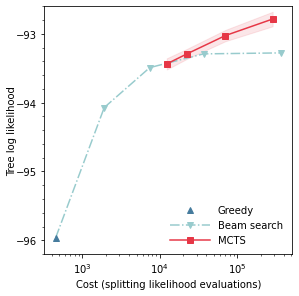

In [17]:
plot = [
    (["greedy"], 6.),
    (["beamsearch_s", "beamsearch_m", "beamsearch_l", "beamsearch_xl"], 5.),
    (["mcts_xs", "mcts_s", "mcts_m", "mcts_l"], 8.),
]

fig = plt.figure(figsize=(4.0, 4.0))
ax = plt.gca()
    
for (keys, z) in plot:
    xs = np.asarray([np.mean(cost_means[key]) for key in keys])
    ys = np.asarray([np.mean(log_likelihood_means[key]) for key in keys])
    dys = np.asarray([np.mean(log_likelihood_stds[key]) for key in keys])
    c, m, ms, lbl, alpha = colors[keys[0]], markers[keys[0]], 6., labels[keys[0]], alphas[keys[0]]
    ls =  linestyles[keys[0]] if len(xs) > 1 else " "
    
    # Include greedy in beam search
    if keys[0] == "beamsearch_s":
        x0 = np.mean(cost_means["greedy"])
        y0 = np.mean(log_likelihood_means["greedy"])
        plt.plot(
            [x0, xs[0]], [y0, ys[0]],
            c=c, lw=1.5, ls=ls, zorder=-1
        )

    # Uncertainty bands
    if len(xs) > 1 and np.nanmax(dys) > 1.e-6:
        plt.fill_between(xs, ys - dys, ys + dys, color=c, alpha=alpha)
    elif len(xs) == 1 and np.nanmax(dys) > 1.e-6:
        plt.fill_between([xs[0] / 1.15, xs[0] * 1.15], list(ys - dys)*2, list(ys + dys)*2, color=c, alpha=alpha)
        
    plt.plot(xs, ys, c=c, lw=1.5, ls=ls, marker=m, markersize=ms, label=lbl, zorder=z)

plt.legend(loc="lower right", frameon=False, handlelength=4)

plt.xscale("log")
ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlabel("Cost (splitting likelihood evaluations)")
plt.ylabel(f"Tree log likelihood")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.ylim(-96.2,-92.6)

plt.subplots_adjust(left=0.13, bottom=0.13, right=0.99, top=0.99, wspace=0, hspace=0)
plt.savefig("figures/rl_ginkgo_log_likelihood_vs_cost.pdf")


### Performance vs # leaves

In [18]:
# plot = ["mle", "greedy", "beamsearch_xl", "mcts_l"]

# fig = plt.figure(figsize=(4.0, 4.0))
# ax = plt.gca()
    
# for key in plot:
#     x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
#     c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
                                                                          
#     if np.max(dy) > 1.e-3:
#         plt.fill_between(x, y-dy, y+dy, color=c, alpha=alpha)
#     plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

# plt.legend(loc="upper left", frameon=False)

# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
# ax.xaxis.set_major_locator(MultipleLocator(5.))
# ax.xaxis.set_minor_locator(MultipleLocator(1.))
# plt.xlabel("Number of leaves")
# plt.ylabel(f"Tree log likelihood relative to {norm_key}")
# ax.xaxis.set_label_coords(0.5, -0.11)
# ax.yaxis.set_label_coords(-0.11, 0.5)
# plt.ylim(-0.2, 4.6)

# plt.subplots_adjust(left=0.15, bottom=0.15, right=0.99, top=0.99, wspace=0, hspace=0)
# plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves1.pdf")


In [19]:
# plot = [
#     ("random", 3),
#     ("greedy", 4),
#     ("lfd",6), 
#     ("lfd_mleteacher", 5),
# ]

# fig = plt.figure(figsize=(4.0, 4.0))
# ax = plt.gca()
    
# for key, z in plot:
#     x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
#     c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    
#     if np.max(dy) > 1.e-3:
#         plt.fill_between(x, y-dy, y+dy, color=c, alpha=alpha)
#     plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl, zorder=z)

# plt.legend(loc="lower left", frameon=False)

# ax.yaxis.set_major_locator(MultipleLocator(50.))
# ax.yaxis.set_minor_locator(MultipleLocator(10.))
# ax.xaxis.set_major_locator(MultipleLocator(5.))
# ax.xaxis.set_minor_locator(MultipleLocator(1.))
# plt.xlabel("Number of leaves")
# plt.ylabel(f"Tree log likelihood relative to {norm_key}")
# ax.xaxis.set_label_coords(0.5, -0.11)
# ax.yaxis.set_label_coords(-0.12, 0.5)
# ax.yaxis.set_tick_params(pad=0.6) 
# plt.ylim(-105, 5)

# plt.subplots_adjust(left=0.15, bottom=0.15, right=0.99, top=0.99, wspace=0, hspace=0)
# plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves2.pdf")


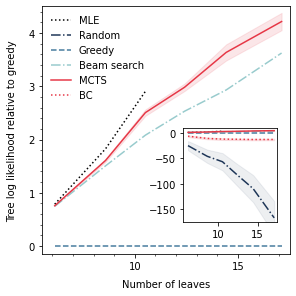

In [20]:
plot = ["mle", "random", "greedy", "beamsearch_xl", "mcts_l", "lfd"]

fig = plt.figure(figsize=(4.0,4.0))

# Larger plot
ax = plt.gca()
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, y-dy, y+dy, color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
plt.xlabel("Number of leaves")
plt.ylabel(f"Tree log likelihood relative to {norm_key}")
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlim(5.5,17.5)
plt.ylim(-0.15, 4.5)

# Smaller plot
ax2 = inset_axes(
    ax,
    width="100%", height="100%",
    bbox_to_anchor=(0.57, .13, .38, .38), 
    bbox_transform=ax.transAxes, loc=3, borderpad=0
)
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, y-dy, y+dy, color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls)

ax2.yaxis.set_major_locator(MultipleLocator(50.))
ax2.xaxis.set_major_locator(MultipleLocator(5.))
plt.xlim(5.5, 17.5)
plt.ylim(-175,10)


plt.subplots_adjust(left=0.13, bottom=0.13, right=0.99, top=0.99, wspace=0, hspace=0)
plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves.pdf")


## Print results

In [21]:
for key in runs.keys():
    mean = np.mean(log_likelihood_means[key])
    err = np.mean(log_likelihood_stds[key])
    cost = np.mean(cost_means[key])
    
    result_str = (f"${mean:6.1f}_{{\\textcolor{{dark-grey}}{{\pm {err:04.1f}}}}}$" if np.isfinite(mean) else " "*42)
    result_str = result_str.replace("\pm 0", "\hphantom{0} \pm ")
    cost_str = (f"{cost:6.0f}" if np.isfinite(cost) else " "*6)
    
    print(f"{key:>22.22}: {result_str} & {cost_str}")
          

                 truth: $ -99.3_{\textcolor{dark-grey}{\hphantom{0} \pm 0.0}}$ &      0
                   mle:                                            &      0
                random: $-198.3_{\textcolor{dark-grey}{\pm 23.8}}$ &      0
                greedy: $ -96.0_{\textcolor{dark-grey}{\hphantom{0} \pm 0.0}}$ &    452
          beamsearch_s: $ -94.1_{\textcolor{dark-grey}{\hphantom{0} \pm 0.0}}$ &   1914
          beamsearch_m: $ -93.5_{\textcolor{dark-grey}{\hphantom{0} \pm 0.0}}$ &   7397
          beamsearch_l: $ -93.3_{\textcolor{dark-grey}{\hphantom{0} \pm 0.0}}$ &  36641
         beamsearch_xl: $ -93.3_{\textcolor{dark-grey}{\hphantom{0} \pm 0.0}}$ & 365634
               mcts_xs: $ -93.4_{\textcolor{dark-grey}{\hphantom{0} \pm 0.1}}$ &  12272
                mcts_s: $ -93.3_{\textcolor{dark-grey}{\hphantom{0} \pm 0.1}}$ &  22592
                mcts_m: $ -93.0_{\textcolor{dark-grey}{\hphantom{0} \pm 0.1}}$ &  70315
                mcts_l: $ -92.8_{\textcolor{dark-grey}{\